<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#06DB73;
           font-size:130%;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="padding: 10px; color:black; font-weight: bold; font-size : 28px;">
IMDb Top Movies </h1>
</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
import plotly.graph_objects as go
import plotly.figure_factory as ff
import collections

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('IMDb_Data_final.csv')
df.head()


,Title,Director,Stars,IMDb-Rating,Category,Duration,Censor-board-rating,ReleaseYear
0,Top Gun: Maverick,JosephKosinski,"TomCruise, JenniferConnelly, MilesTeller, ValK...",8.6,"Action,Drama",130min,UA,2022
1,Everything Everywhere All at Once,"DanKwan,",", MichelleYeoh, StephanieHsu, KeHuyQuan, James...",8.3,"Action,Adventure,Comedy",139min,R,2022
2,The Batman,MattReeves,"RobertPattinson, ZoëKravitz, JeffreyWright, Co...",7.9,"Action,Crime,Drama",176min,UA,2022
3,Jurassic Park,StevenSpielberg,"SamNeill, LauraDern, JeffGoldblum, RichardAtte...",8.2,"Action,Adventure,Sci-Fi",127min,UA,1993
4,The Godfather,FrancisFordCoppola,"MarlonBrando, AlPacino, JamesCaan, DianeKeaton",9.2,"Crime,Drama",175min,A,1972


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                1000 non-null   object 
 1   Director             1000 non-null   object 
 2   Stars                1000 non-null   object 
 3   IMDb-Rating          1000 non-null   float64
 4   Category             999 non-null    object 
 5   Duration             999 non-null    object 
 6   Censor-board-rating  846 non-null    object 
 7   ReleaseYear          1000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [4]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print(f"{i}'s null rate : {null_rate}%")

Category's null rate : 0.1%
Duration's null rate : 0.1%
Censor-board-rating's null rate : 15.4%


In [5]:
df.describe(include='all').head(4)

,Title,Director,Stars,IMDb-Rating,Category,Duration,Censor-board-rating,ReleaseYear
count,1000,1000,1000,1000.0,999,999,846,1000.0
unique,998,572,998,NaN,202,143,22,NaN
top,Drishyam,StevenSpielberg,"Prabhas, RanaDaggubati, AnushkaShetty, Tamanna...",NaN,Drama,130min,U,NaN
freq,2,13,2,NaN,83,24,270,NaN


# 📊 Exploratory Data Analysis

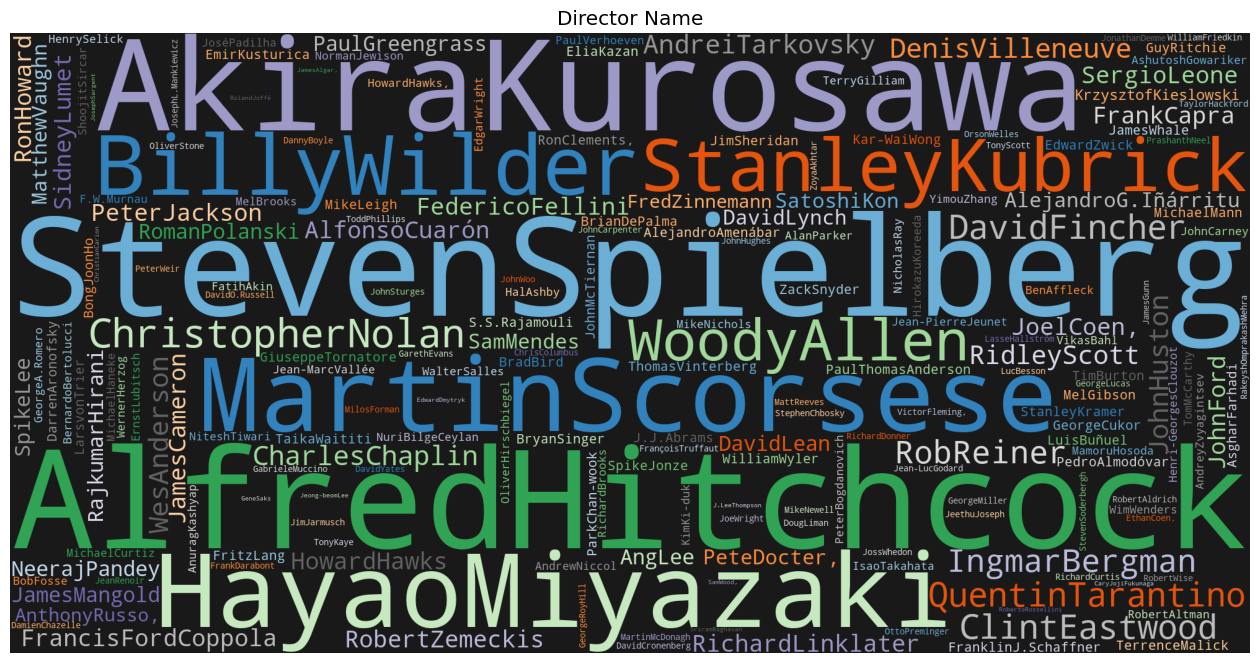

In [6]:
plt.figure(figsize=(16,10))
data = df['Director'].value_counts().to_dict()
wc = WordCloud(width= 2000, height = 1000, random_state=1,background_color='#191919', colormap='tab20c').generate_from_frequencies(data)
plt.imshow(wc)
plt.title('Director Name')
plt.axis('off')
plt.show()

# 🎬 Top Director with the most high score movies

In [7]:
topDirector = df['Director'].value_counts().head(10)
topDirector = pd.DataFrame(data=topDirector)

In [8]:
fig = px.bar(topDirector, x=topDirector.Director, y=topDirector.index,color=topDirector.index,
            title='Top Director with the most high score movies', text_auto='.2s',width=1000, height=700, 
       color_discrete_map={
                "StevenSpielberg": "crimson",
                "AlfredHitchcock": "crimson",
                "AkiraKurosawa": "lightslategray",
                "HayaoMiyazaki": "lightslategray",
                "MartinScorsese": "lightslategray",
                "BillyWilder": "lightslategray",
                "StanleyKubrick": "lightslategray",
                "WoodyAllen": "lightslategray",
                "ChristopherNolan": "lightslategray",
                "QuentinTarantino": "lightslategray",
       })
fig.update_layout(showlegend=False)

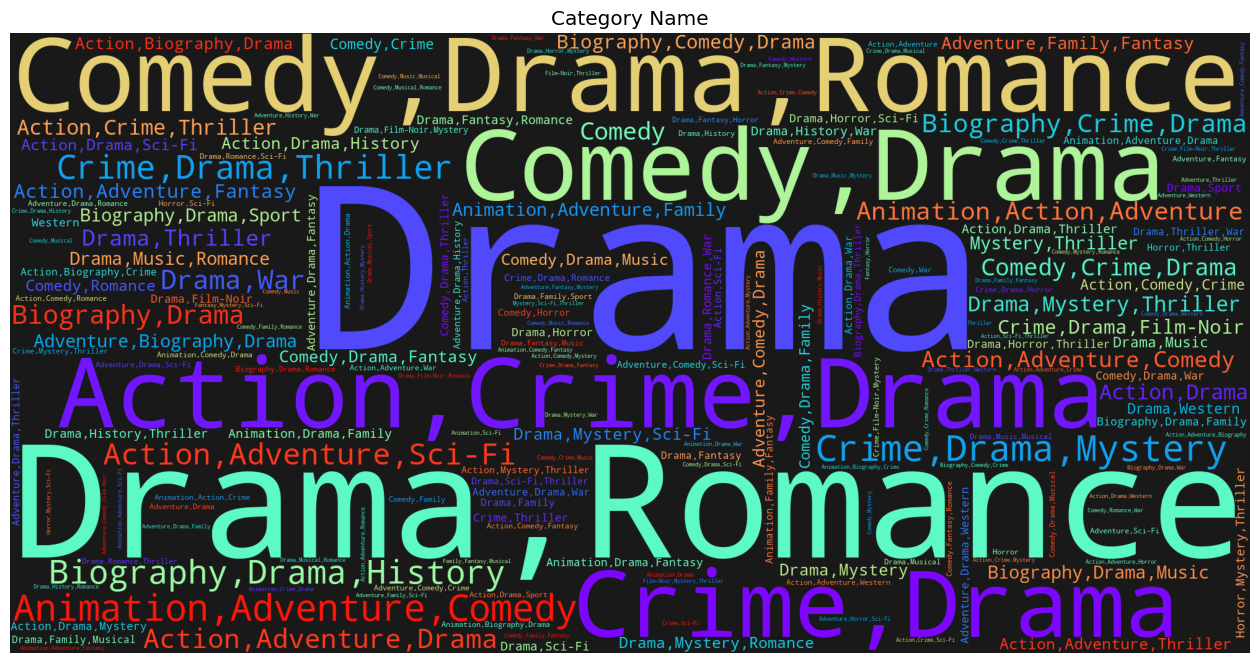

In [9]:
plt.figure(figsize=(16,10))
data = df['Category'].value_counts().to_dict()
wc = WordCloud(width= 2000, height = 1000, random_state=1,background_color='#191919', colormap='rainbow').generate_from_frequencies(data)
plt.imshow(wc)
plt.title('Category Name')
plt.axis('off')
plt.show()

# Movie Category

In [10]:
categorycount = df.groupby('Category').count().sort_values(by = 'Title', ascending=False).head(10)
categorycount.rename(columns={'index':'Value'}, inplace=True)

In [11]:
from matplotlib import gridspec

import squarify

y = categorycount
fig = plt.figure(figsize=(15, 15))
squarify.plot(sizes = y.Title, label = y.index, color=sns.color_palette("coolwarm", n_colors=20),
             linewidth=4, text_kwargs={'fontsize':14, 'fontweight' : 'bold'})
plt.title('Top 10 Categories', position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold')
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'squarify'

# ⭐ IMDb Rating

In [ ]:
topscore = pd.Series(collections.Counter(df['IMDb-Rating']), name="IMDb-Rating").to_frame(name = 'Count').sort_values(by = 'Count',ascending=False).head(5)

In [ ]:
from plotly.subplots import make_subplots
colors = ['lightslategray',] * 5
colors[0] = '#DBA506'
fig1 = make_subplots(rows=1, cols=2)
trace0 = go.Histogram(x=df['IMDb-Rating'])
trace1 = go.Bar(x=topscore.index, y=topscore.Count,marker_color=colors)
fig1.append_trace(trace0, 1, 1)
fig1.append_trace(trace1, 1, 2)
fig1.update_layout(height=600, width=920, title_text="Distribution of IMDb Rating")
fig1.show()

In [ ]:
fig = px.density_heatmap(df, x="ReleaseYear", y="IMDb-Rating", title = 'Density of IMDb Rating Vs. Release Year')
fig.show()

# Frequency of censor board rating

Text(0.5, 1.0, 'Frequency of censor board rating')

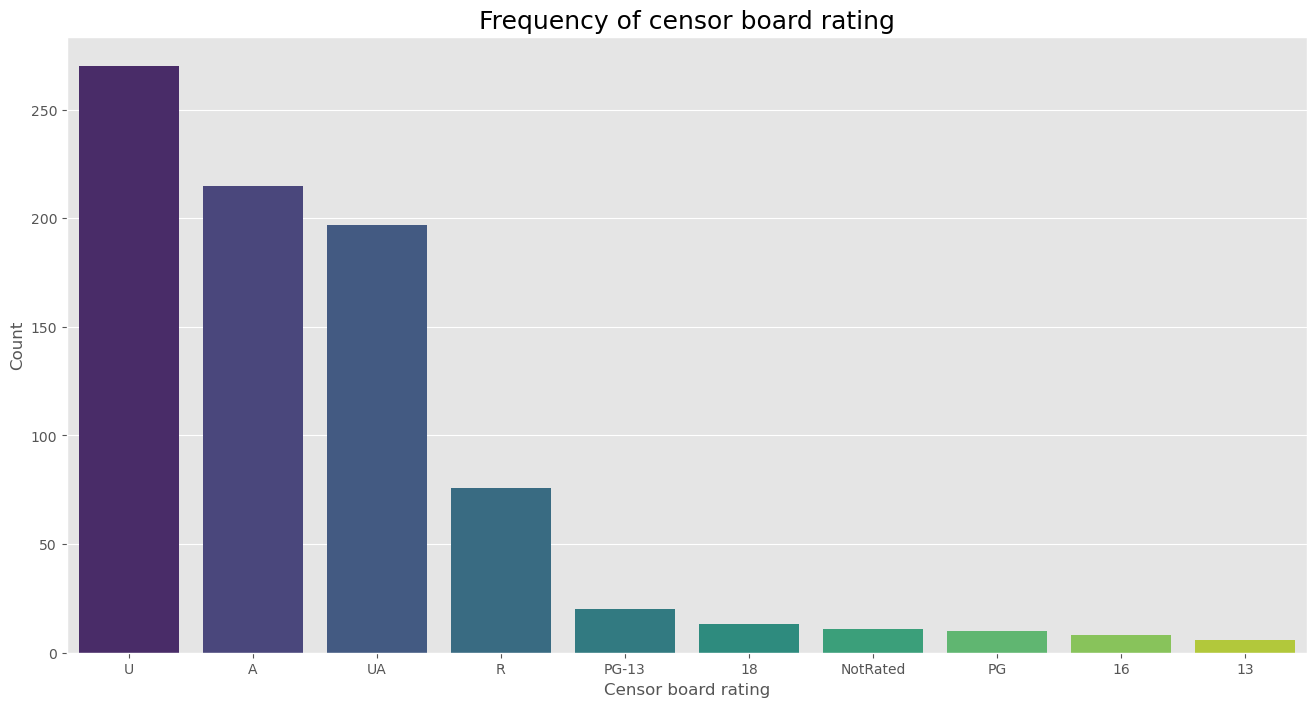

In [ ]:
plt.figure(figsize=(16,8))
censor = sns.countplot(x='Censor-board-rating',data=df, order=df['Censor-board-rating'].value_counts().index[0:10],palette='viridis')
plt.ylabel('Count',fontsize=12)
plt.xlabel('Censor board rating',fontsize=12)
plt.title('Frequency of censor board rating',fontsize=18)

In [ ]:
censor = df['Censor-board-rating'].value_counts()[0:5].to_frame(name = 'Count')

In [ ]:
fig = px.pie(censor, names=censor.index,values=censor.Count,title='Population of Censor board rating',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

# Frequency of High Score Movies in Each Year

Text(0.5, 58.7222222222222, 'Date')

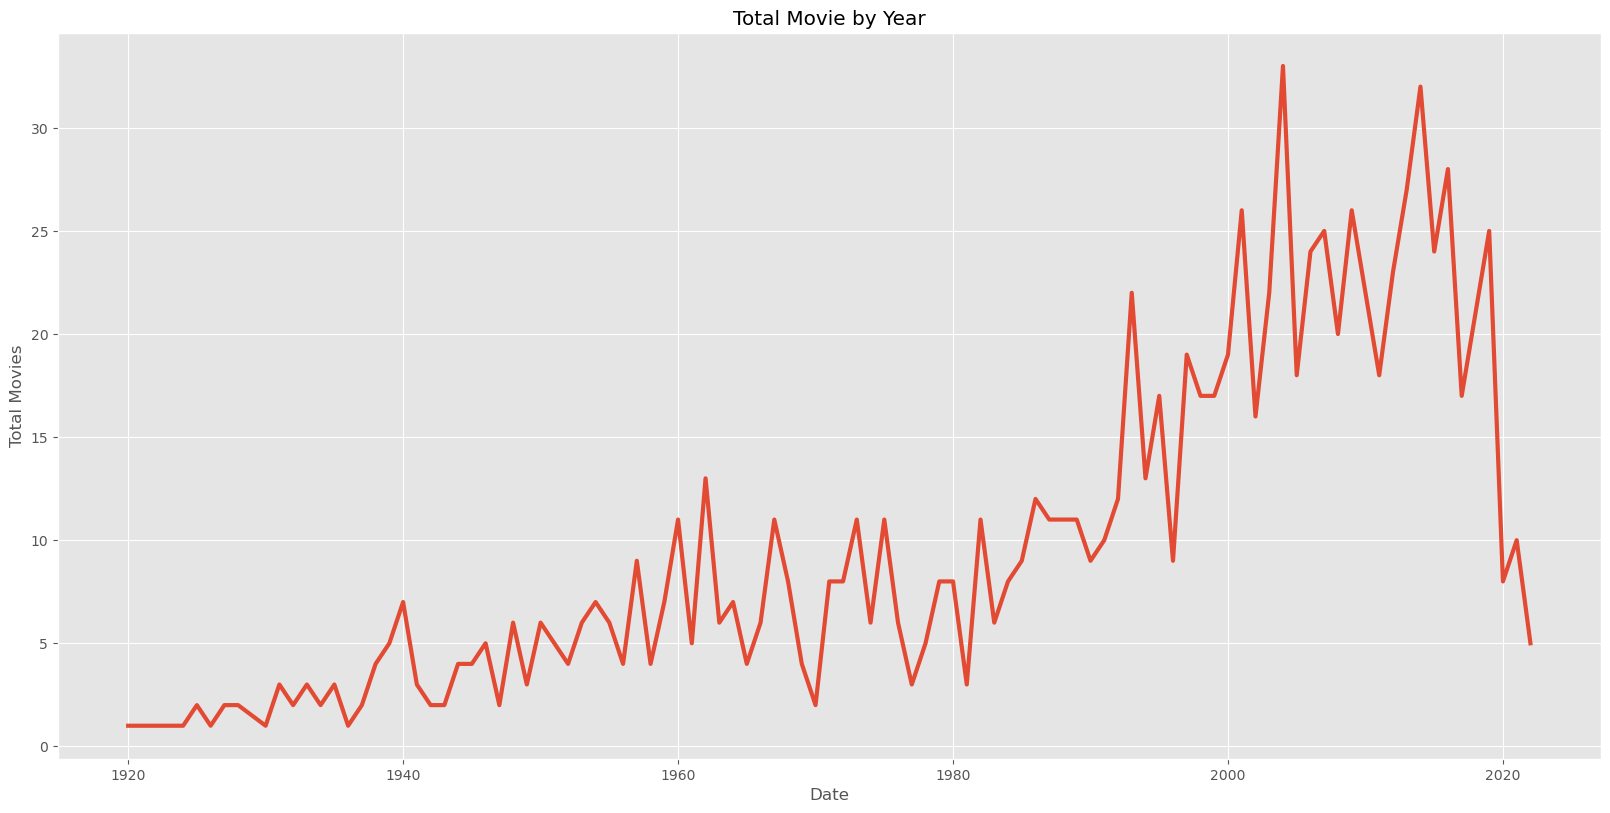

In [ ]:
plt.figure(figsize=(16,8))
df.groupby('ReleaseYear').count()['Title'].plot(linewidth = 3)
plt.tight_layout()
plt.title('Total Movie by Year')
plt.ylabel("Total Movies")
plt.xlabel("Date")

In [ ]:
topyear = pd.Series(collections.Counter(df['ReleaseYear']), name="ReleaseYear").to_frame(name = 'Count').sort_values(by = 'Count',ascending=False).head(10)

Text(0.5, 1.0, 'Frequency of Movies in each year')

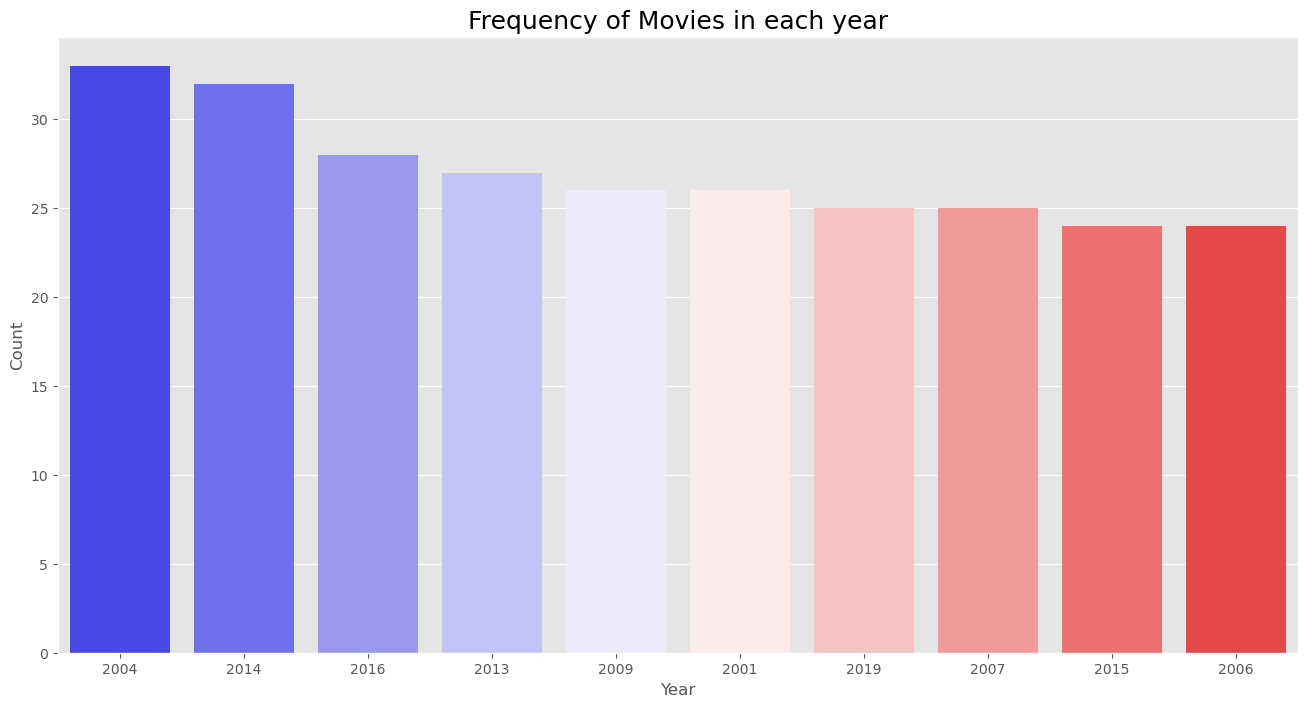

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x=topyear.index, y=topyear.Count, data=topyear,order = topyear['Count'].index[0:10],palette="bwr")
plt.ylabel('Count',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.title('Frequency of Movies in each year',fontsize=18)

In [ ]:
fig = px.pie(topyear, names=topyear.index,values=topyear.Count,title='Population of Movies in each year',color_discrete_sequence=px.colors.sequential.Blues)
fig.show()

# 🎥 Recent movies with highest score

In [ ]:
recentmovie = df[df['ReleaseYear'] == 2022]

In [ ]:
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year','Director', 'Category', 'Rating'],fill_color='paleturquoise',height=30,align='left',font=dict(color='black', size=13)),
                              cells = dict(values=[recentmovie['Title'], recentmovie['ReleaseYear'],recentmovie['Director'], recentmovie['Category'], recentmovie['IMDb-Rating']],fill_color='lavender',height=30,align='left'))])
fig.update_layout(title_text="Recent movies with highest rating")
fig.show()

# Top 20 Movies on IMDb

In [ ]:
top20movies = df.sort_values(by=['IMDb-Rating'], ascending=False).head(20)

In [ ]:
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year','Director', 'Category', 'Rating'],fill_color='Khaki',height=30,align='left',font=dict(color='black', size=13)),
                              cells = dict(values=[top20movies['Title'], top20movies['ReleaseYear'],top20movies['Director'], top20movies['Category'], top20movies['IMDb-Rating']],fill_color='lavender',height=30,align='left'))])
fig.update_layout(height=940, width=850, title_text="Top Movies in IMDb all the time")
fig.show()

Text(0.5, 0, 'Rating')

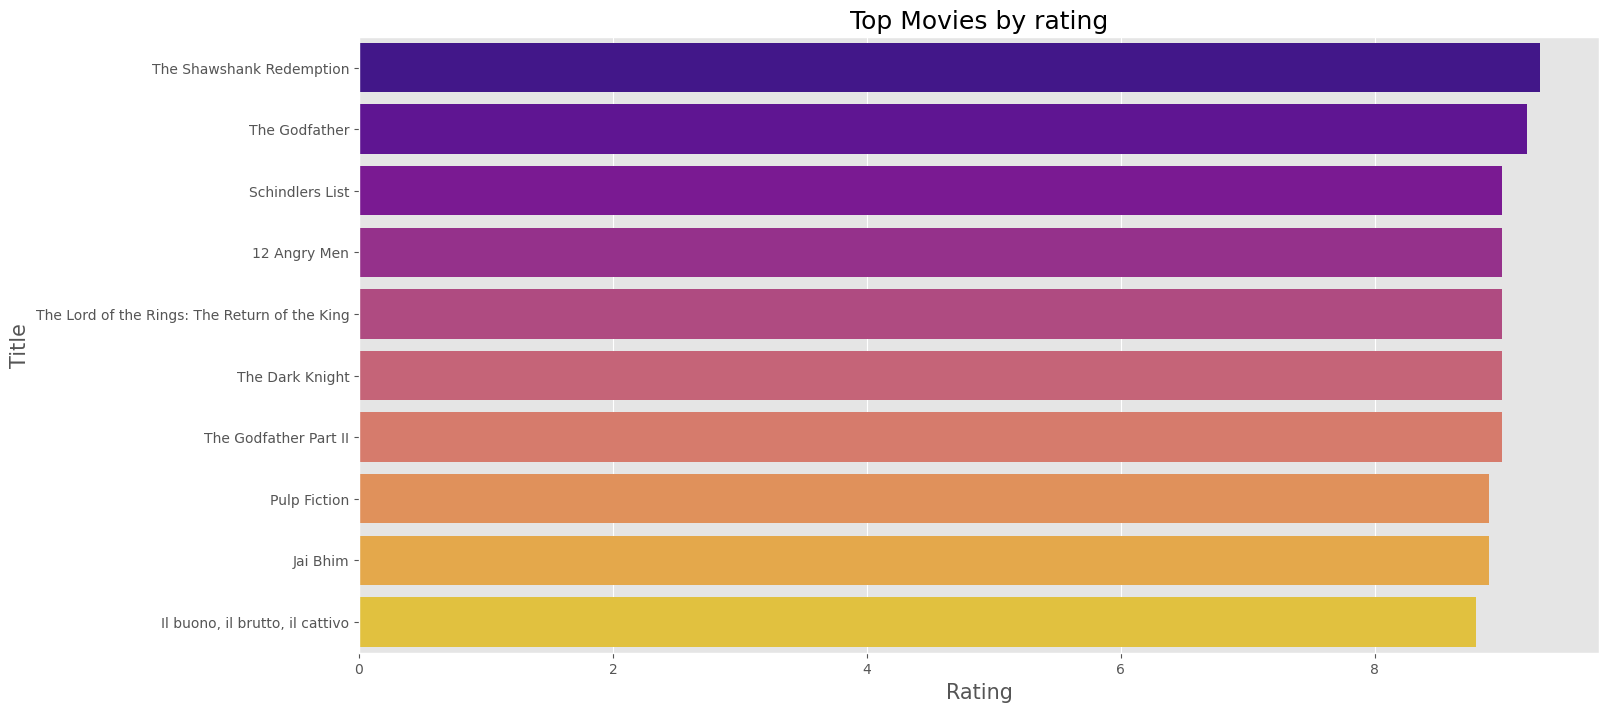

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x='IMDb-Rating',y=top20movies.Title[0:10],data=top20movies,palette='plasma')
plt.title('Top Movies by rating',fontsize=18, color = 'black')
plt.ylabel('Title',fontsize=15)
plt.xlabel('Rating',fontsize=15)

# 1st Movie on IMDb based on Score

In [ ]:
table_data = [['The Shawshank Redemption', '1st Rank'],
              ['Release Year', 1994],
              ['Director', 'Frank Darabont'],
              ['Stars', 'Tim Robbins, Morgan Freeman, Bob Gunton'],
              ['Category', 'Darama'],
              ['Rating', 9.3],
              ['Censor board rating', 'A'],
              ['Duration', '142 min']]
fig = ff.create_table(table_data, height_constant=60)
fig.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                1000 non-null   object 
 1   Director             1000 non-null   object 
 2   Stars                1000 non-null   object 
 3   IMDb-Rating          1000 non-null   float64
 4   Category             999 non-null    object 
 5   Duration             999 non-null    object 
 6   Censor-board-rating  846 non-null    object 
 7   ReleaseYear          1000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [ ]:
features = ['Category', 'Title', 'Stars', 'Director']

In [ ]:
def combine_features(row):
    return row['Title']+' '+row['Category']+' '+row['Director']+' '+row['Stars']

In [ ]:
for feature in features:
    df[feature] = df[feature].fillna('')

In [ ]:
df['combined_features'] = df.apply(combine_features, axis = 1)
df.head()

,Title,Director,Stars,IMDb-Rating,Category,Duration,Censor-board-rating,ReleaseYear,combined_features
0,Top Gun: Maverick,JosephKosinski,"TomCruise, JenniferConnelly, MilesTeller, ValK...",8.6,"Action,Drama",130min,UA,2022,"Top Gun: Maverick Action,Drama JosephKosinski ..."
1,Everything Everywhere All at Once,"DanKwan,",", MichelleYeoh, StephanieHsu, KeHuyQuan, James...",8.3,"Action,Adventure,Comedy",139min,R,2022,"Everything Everywhere All at Once Action,Adven..."
2,The Batman,MattReeves,"RobertPattinson, ZoëKravitz, JeffreyWright, Co...",7.9,"Action,Crime,Drama",176min,UA,2022,"The Batman Action,Crime,Drama MattReeves Rober..."
3,Jurassic Park,StevenSpielberg,"SamNeill, LauraDern, JeffGoldblum, RichardAtte...",8.2,"Action,Adventure,Sci-Fi",127min,UA,1993,"Jurassic Park Action,Adventure,Sci-Fi StevenSp..."
4,The Godfather,FrancisFordCoppola,"MarlonBrando, AlPacino, JamesCaan, DianeKeaton",9.2,"Crime,Drama",175min,A,1972,"The Godfather Crime,Drama FrancisFordCoppola M..."


In [ ]:
print(df.loc[0, 'combined_features'])

Top Gun: Maverick Action,Drama JosephKosinski TomCruise, JenniferConnelly, MilesTeller, ValKilmer


In [ ]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(df['combined_features'])

In [ ]:
cosine_sim = cosine_similarity(count_matrix)

In [ ]:
df['index'] = df.index
df.head()

,Title,Director,Stars,IMDb-Rating,Category,Duration,Censor-board-rating,ReleaseYear,combined_features,index
0,Top Gun: Maverick,JosephKosinski,"TomCruise, JenniferConnelly, MilesTeller, ValK...",8.6,"Action,Drama",130min,UA,2022,"Top Gun: Maverick Action,Drama JosephKosinski ...",0
1,Everything Everywhere All at Once,"DanKwan,",", MichelleYeoh, StephanieHsu, KeHuyQuan, James...",8.3,"Action,Adventure,Comedy",139min,R,2022,"Everything Everywhere All at Once Action,Adven...",1
2,The Batman,MattReeves,"RobertPattinson, ZoëKravitz, JeffreyWright, Co...",7.9,"Action,Crime,Drama",176min,UA,2022,"The Batman Action,Crime,Drama MattReeves Rober...",2
3,Jurassic Park,StevenSpielberg,"SamNeill, LauraDern, JeffGoldblum, RichardAtte...",8.2,"Action,Adventure,Sci-Fi",127min,UA,1993,"Jurassic Park Action,Adventure,Sci-Fi StevenSp...",3
4,The Godfather,FrancisFordCoppola,"MarlonBrando, AlPacino, JamesCaan, DianeKeaton",9.2,"Crime,Drama",175min,A,1972,"The Godfather Crime,Drama FrancisFordCoppola M...",4


In [ ]:
def get_title_from_index(index):
    return df[df.index == index]["Title"].values[0]
def get_index_from_title(Title):
    return df[df.Title == Title]["index"].values[0]

## USER INPUT

In [ ]:
movie_user_likes = "Titanic"
movie_index = get_index_from_title(movie_user_likes)
similar_movies = list(enumerate(cosine_sim[movie_index]))

In [ ]:
sorted_similar_movies = sorted(similar_movies,key=lambda x:x[1],reverse=True)[1:]

In [ ]:
i=0
print("Top 10 similar movies to "+movie_user_likes+" are:\n")
for element in sorted_similar_movies:
    print(get_title_from_index(element[0]))
    i=i+1
    if i>10:
        break

Top 10 similar movies to Titanic are:

Sense and Sensibility
True Romance
Eternal Sunshine of the Spotless Mind
Misery
Smultronstället
96
Forrest Gump
Django Unchained
Pride & Prejudice
Atonement
Little Women
